## Sampling for the Match Filter

In [116]:
#Libraries to import
using SerialPorts
using PyPlot
using FFTW 
list_serialports()

1-element Array{String,1}:
 "COM3"

In [352]:
list_serialports() # show available ports

array_one = []
array_two = []

b = ""


ser = SerialPort("COM3:", 9600) 

readavailable(ser)

#transmit and receive
write(ser, "c")

while bytesavailable(ser) < 1
    continue 
end

sleep(0.05)
readavailable(ser) #removes the conversion complete line

# Get the first buffer

write(ser, "a") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

array_one=split(b, ("\r\n"))

b = "" #clear b

#second buffer
write(ser, "b") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

close(ser)

array_two=split(b, ("\r\n"))


println(length(array_one)) 
println(length(array_two)) 


30001


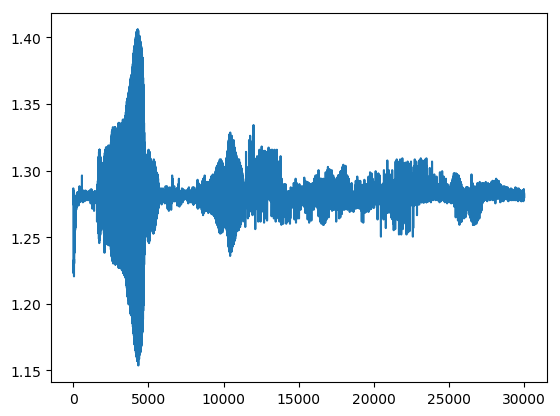

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000509D3C8>

In [353]:
ac1 = []
i=1

while (i<length(array_one)-1)
    if length(array_one[i])>5
        push!(ac,parse(Int,(array_one[i][1:4])))
        push!(ac,parse(Int,(array_one[i][5:8])))
    else    
        push!(ac,parse(Int,(array_one[i])))        
    end 
    i+=1
end

match_one = (3.3/4096).*ac1

figure()
plot(match_one)

In [ ]:
ac2 = []
i=1

while (i<length(array_two)-1)
    if length(array_two[i])>5
        push!(ac2,parse(Int,(array_two[i][1:4])))
        push!(ac2,parse(Int,(array_two[i][5:8])))
    else    
        push!(ac2,parse(Int,(array_two[i])))        
    end 
    i+=1
end

match_two = (3.3/4096).*ac2

figure()
plot(match_two)

## Sampling the Echo 

In [370]:
list_serialports() # show available ports

receive_one = []
receive_two = []

b = ""


ser = SerialPort("COM3:", 9600) 

readavailable(ser)

#transmit and receive
write(ser, "c")

while bytesavailable(ser) < 1
    continue 
end

sleep(0.05)
readavailable(ser) #removes the conversion complete line

# Get the first buffer

write(ser, "a") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

receive_one=split(b, ("\r\n"))

b = "" #clear b

#second buffer
write(ser, "b") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

close(ser)

receive_two=split(b, ("\r\n"))


println(length(receive_one)) 
println(length(receive_two)) 


29355


In [ ]:
rc1 = []
i=1

while (i<length(receive_one)-1)
    if length(receive_one[i])>5
        push!(rc1,parse(Int,(receive_one[i][1:4])))
        push!(rc1,parse(Int,(receive_one[i][5:8])))
    else    
        push!(rc1,parse(Int,(receive_one[i])))        
    end 
    i+=1
end

echo_one = (3.3/4096).*rc1

figure()
plot(echo_one)

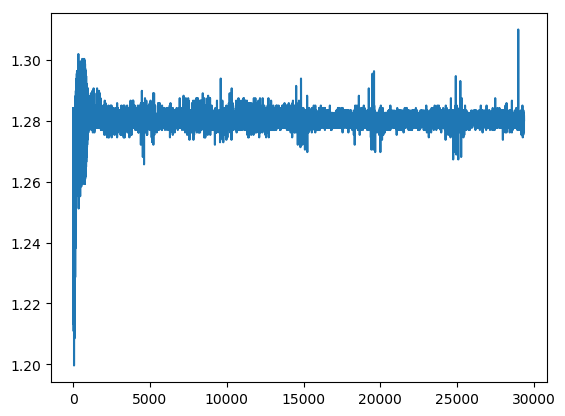

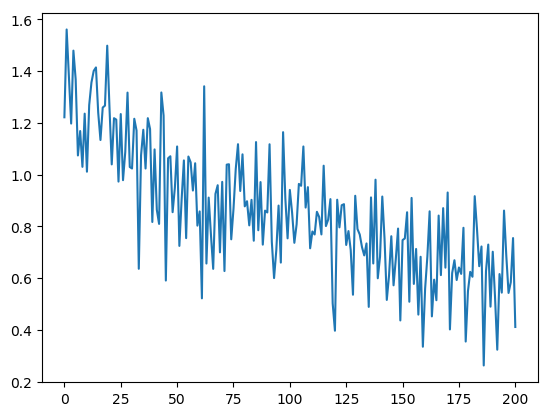

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026F333C8>

In [371]:
rc2 = []
i=1

while (i<length(receive_two)-1)
    if length(receive_two[i])>5
        push!(rc2,parse(Int,(receive_two[i][1:4])))
        push!(rc2,parse(Int,(receive_two[i][5:8])))
    else    
        push!(rc2,parse(Int,(receive_two[i])))        
    end 
    i+=1
end

echo_2 = (3.3/4096).*rc2

figure()
plot(echo_2)

### Values for Processing

In [357]:
c = 343;          # Speed of sound in air in m/s
fs = 500000;       # This is the sample rate of the sonar.
dt = 1/fs;        # This is the sample spacing
r_max = 10;        # Maximum range in metres to which to simulate.
t_max = 2*r_max/c;

t = collect(0:dt:t_max);

# t = t[0:length(y)]
r = c*t/2;        

f0 = 40000;       # Centre frequency is 10 kHz
B = 2000;         # Chirp bandwidth
T = 6E-3;         # Chirp pulse length
K = B/T;          # Chirp rate

td = 0.6*T;

## Matched Filtering

In [358]:
N = length(t);
Δf = 1/(N*dt)  
# spacing in frequency domain

#create array of freq values stored in f_axis. First element maps to 0Hz
f_axis = (0:N-1)*Δf; 
print(N)

29155

In [360]:
match = (3.3/4096).*match

29999-element Array{Float64,1}:
 0.0010346567630767822
 0.0010366040468215941
 0.001034007668495178 
 0.001028814911842346 
 0.001026867628097534 
 0.0010353058576583862
 0.0010346567630767822
 0.0010320603847503661
 0.0009885710477828978
 0.0009872728586196899
 0.0009872728586196899
 0.0009885710477828978
 0.0009885710477828978
 ⋮                    
 0.0010314112901687622
 0.00103270947933197  
 0.00103270947933197  
 0.0010320603847503661
 0.00103270947933197  
 0.001030762195587158 
 0.0010320603847503661
 0.0010314112901687622
 0.001030762195587158 
 0.0010314112901687622
 0.0010314112901687622
 0.001033358573913574 

In [361]:
v_tx = match[1:length(t)] #the matched filter will be the 

# figure() # Create a new figure
# title("Transmitted Chirp pulse")
# xlabel("Time in s")
# plot(t,v_tx) # Basic plot, axis labeled in samples


29155-element Array{Float64,1}:
 0.0010346567630767822
 0.0010366040468215941
 0.001034007668495178 
 0.001028814911842346 
 0.001026867628097534 
 0.0010353058576583862
 0.0010346567630767822
 0.0010320603847503661
 0.0009885710477828978
 0.0009872728586196899
 0.0009872728586196899
 0.0009885710477828978
 0.0009885710477828978
 ⋮                    
 0.0010353058576583862
 0.001033358573913574 
 0.0010314112901687622
 0.0010320603847503661
 0.00103270947933197  
 0.001033358573913574 
 0.001033358573913574 
 0.0010314112901687622
 0.0010314112901687622
 0.0010314112901687622
 0.0010314112901687622
 0.00103270947933197  

In [362]:
#to see the freqeuncy domain use FFT function
V_TX = fft(v_tx);

# figure("Frequency in Hz");
# plot(f_axis[1:2000], abs.(fftshift(V_TX))[1:2000]);
# title("Chirp pulse")
# xlabel("Frequency in Hz");

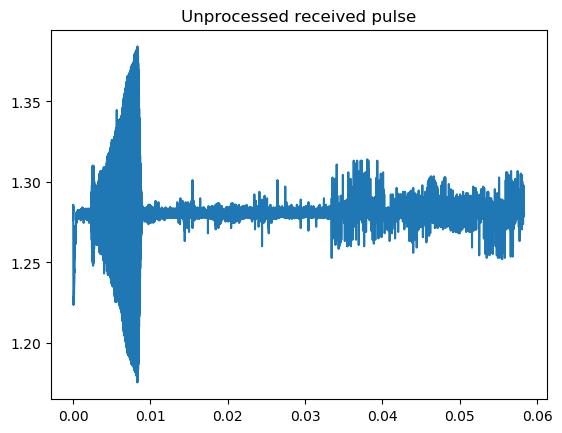

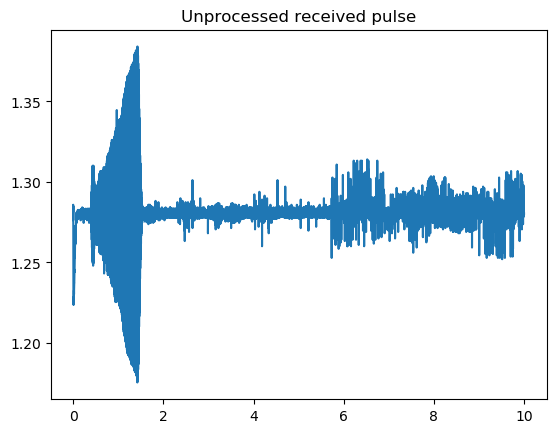

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026D8B160>

In [363]:
v_rx = receive[1:length(t)]

figure() # Create a new figure
title("Unprocessed received pulse")
plot(t,v_rx) # Basic plot, axis labeled in samples

figure() # Create a new figure
title("Unprocessed received pulse")
plot(r,v_rx) # Basic plot, axis labeled in samples

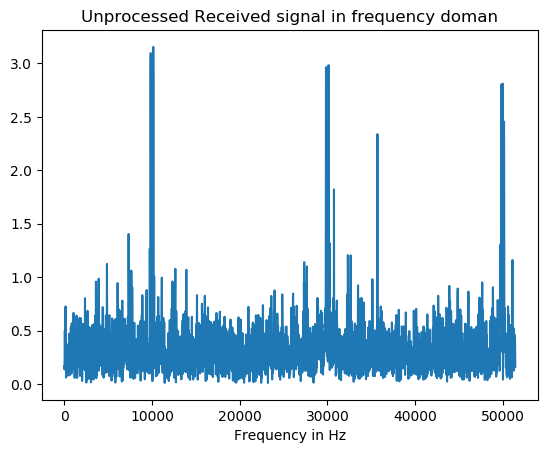

In [364]:
V_RX = (fft(v_rx));

figure("Unprocessed Received signal in frequency doman")
plot(f_axis[1:3000],abs.(fftshift(V_RX))[1:3000] )
title("Unprocessed Received signal in frequency doman")
xlabel("Frequency in Hz");

## Matched Signal

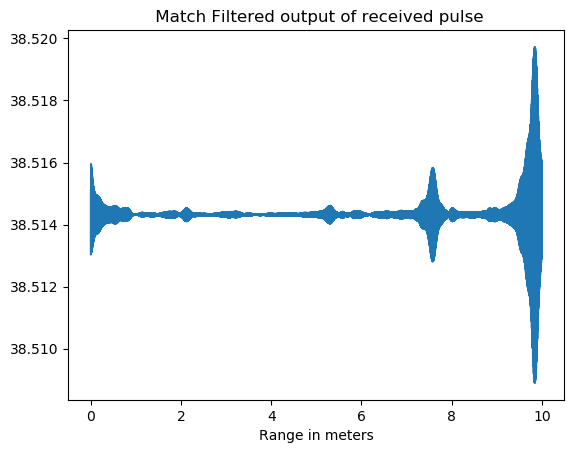

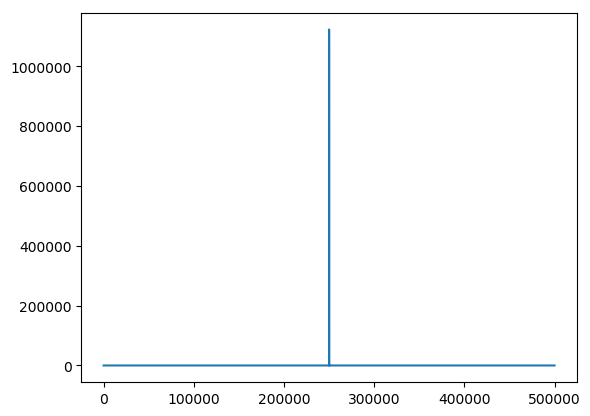

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002727DAC8>

In [365]:
H = conj( V_TX);

V_MF = H.*V_RX;
v_mf = ifft(V_MF);

figure() # Create a new figure
xlabel("Range in meters")
title(" Match Filtered output of received pulse")
plot(r, v_mf) # Basic plot, axis labeled in samples

figure()
plot(f_axis,abs.(fftshift(V_MF)) )

In [372]:
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);

V_ANAL = 2*V_MF; # make a copy and double the values

N = length(V_MF);

if mod(N,2)==0 # case N even
    neg_freq_range = Int(N/2):N; # Define range of “neg-freq” components
else # case N odd
    neg_freq_range = Int((N+1)/2):N;
end

V_ANAL[neg_freq_range] .= 0; # Zero out neg components in 2nd half of array.
v_anal = ifft(V_ANAL);

In [373]:
figure()
title("Analytic signal")
xlabel("Range in meters")
plot(r,abs.(v_anal))

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\Niceta Nduku\.julia\packages\PyCall\ttONZ\src\pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (1,) and (29155,)',)
  File "C:\Users\Niceta Nduku\.julia\conda\3\lib\site-packages\matplotlib\pyplot.py", line 2811, in plot
    is not None else {}), **kwargs)
  File "C:\Users\Niceta Nduku\.julia\conda\3\lib\site-packages\matplotlib\__init__.py", line 1810, in inner
    return func(ax, *args, **kwargs)
  File "C:\Users\Niceta Nduku\.julia\conda\3\lib\site-packages\matplotlib\axes\_axes.py", line 1611, in plot
    for line in self._get_lines(*args, **kwargs):
  File "C:\Users\Niceta Nduku\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 393, in _grab_next_args
    yield from self._plot_args(this, kwargs)
  File "C:\Users\Niceta Nduku\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 370, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "C:\Users\Niceta Nduku\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 231, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))


In [295]:
j=im; # Assign j as sqrt(-1) (“im” in julia)
v_bb = v_anal.*exp.(-j*2*pi*f0.*t);

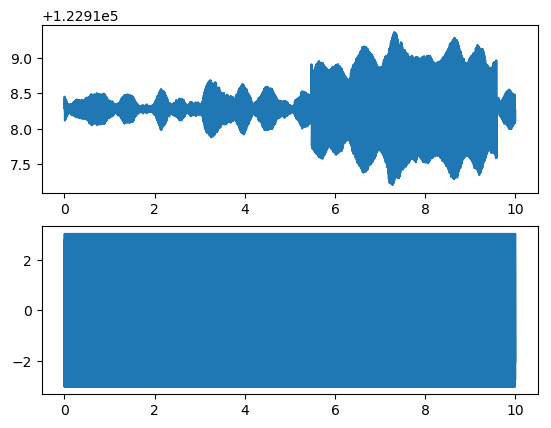

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000015E90B8>

In [58]:
figure()
subplot(2,1,1)
plot(r,abs.(v_bb))
subplot(2,1,2)
plot(r,angle.(v_bb)) #query

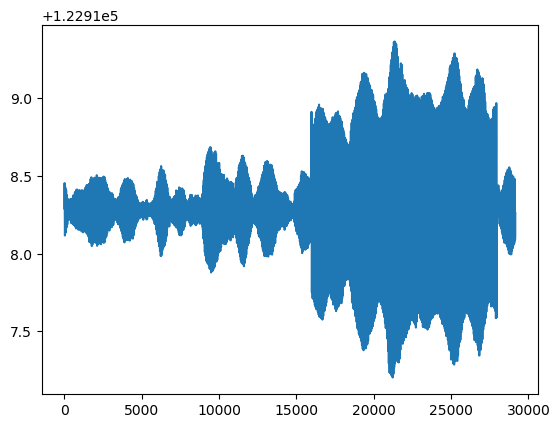

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000266CE80>

In [59]:
V_BB = fft(v_bb); 
figure()
plot(abs.(v_bb))

In [115]:
close(ser)

SerialPort("COM3:", 9600, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0x3264f9e8, open=False>(port='COM3:', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))